<a href="https://colab.research.google.com/github/raman2402/Machine-Learning/blob/main/breast_cancer_sampling_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check class distribution
print("\nClass distribution:")
print(df['target'].value_counts())


Summary statistics:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             

In [14]:
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)


smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_df, y_train_df)

X_train_resampled = X_train_resampled.to_numpy()
y_train_resampled = y_train_resampled.to_numpy()

print("X_train_resampled shape", X_train_resampled.shape)
print("Y_train_resampled shape", y_train_resampled.shape)

X_train shape: (398, 30)
X_test shape: (171, 30)
y_train shape: (398,)
y_test shape: (171,)
X_train_resampled shape (498, 30)
Y_train_resampled shape (498, 1)


In [15]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

print("\nClassification Report after Balancing:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix before balancing:")
print(confusion_matrix(y_test, y_pred))

accuracy  = accuracy_score(y_test, y_pred)
print("Accuracy before hyperparameter tuning and before balancing: ", accuracy)

#Using the new balanced data samples

clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = clf.predict(X_test)

print("\nClassification Report before balancing:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix after balancing:")
print(confusion_matrix(y_test, y_pred))

accuracy  = accuracy_score(y_test, y_pred)
print("Accuracy before hyperparameter tuning and after balancing: ", accuracy)


Classification Report after Balancing:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171


Confusion Matrix before balancing:
[[ 60   3]
 [  7 101]]
Accuracy before hyperparameter tuning and before balancing:  0.9415204678362573

Classification Report before balancing:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        63
           1       0.95      0.92      0.93       108

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171


Confusion Matrix after balancing:
[[58  5]
 [ 9 99]]
Accuracy before hyperparameter tuning and after balancing:  0.9181286549

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [11]:
from imblearn.under_sampling import RandomUnderSampler

# Apply RandomUnderSampler to the training set
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_df, y_train_df)

# Convert back to numpy arrays if needed
X_train_undersampled = X_train_undersampled.to_numpy()
y_train_undersampled = y_train_undersampled.to_numpy()

print("X_train_undersampled shape:", X_train_undersampled.shape)
print("y_train_undersampled shape:", y_train_undersampled.shape)


X_train_undersampled shape: (298, 30)
y_train_undersampled shape: (298, 1)


In [12]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_df, y_train_df)

# Convert back to numpy arrays if needed
X_train_undersampled = X_train_undersampled.to_numpy()
y_train_undersampled = y_train_undersampled.to_numpy()

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the undersampled training data
clf.fit(X_train_undersampled, y_train_undersampled)

# Make predictions on the test data
y_pred = clf.predict(X_test)

print("\nClassification Report after Undersampling:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix after Undersampling:")
print(confusion_matrix(y_test, y_pred))

accuracy  = accuracy_score(y_test, y_pred)
print("Accuracy after Undersampling: ", accuracy)



Classification Report after Undersampling:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        63
           1       0.98      0.92      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171


Confusion Matrix after Undersampling:
[[61  2]
 [ 9 99]]
Accuracy after Undersampling:  0.935672514619883


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [6]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'min_samples_split': [2, 5, 10],
    'max_depth': [None] + list(range(2, 50, 1)),
    'max_leaf_nodes': [None, 5, 10, 20, 30, 40, 50]
}

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("\nBest Parameters:")
print(best_params)

# Compare with the default parameters
default_params = clf.get_params()
print("\nDefault Parameters:")
print(default_params)

# Use the best estimator to make predictions
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)

# Generate and print the classification report for the best estimator
print("\nClassification Report (Best Estimator):")
print(classification_report(y_test, y_pred_best))

# Generate and print the confusion matrix for the best estimator
print("\nConfusion Matrix (Best Estimator):")
print(confusion_matrix(y_test, y_pred_best))

accuracy  = accuracy_score(y_test, y_pred_best)
print("Accuracy after the hyperparameter tuning: ", accuracy)


Best Parameters:
{'max_depth': 4, 'max_leaf_nodes': None, 'min_samples_split': 2}

Default Parameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}

Classification Report (Best Estimator):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171


Confusion Matrix (Best Estimator):
[[ 59   4]
 [  4 104]]
Accuracy after the hyperparameter tuning:  0.9532163742690059


In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

Decison tree before the hyperparameter tuning


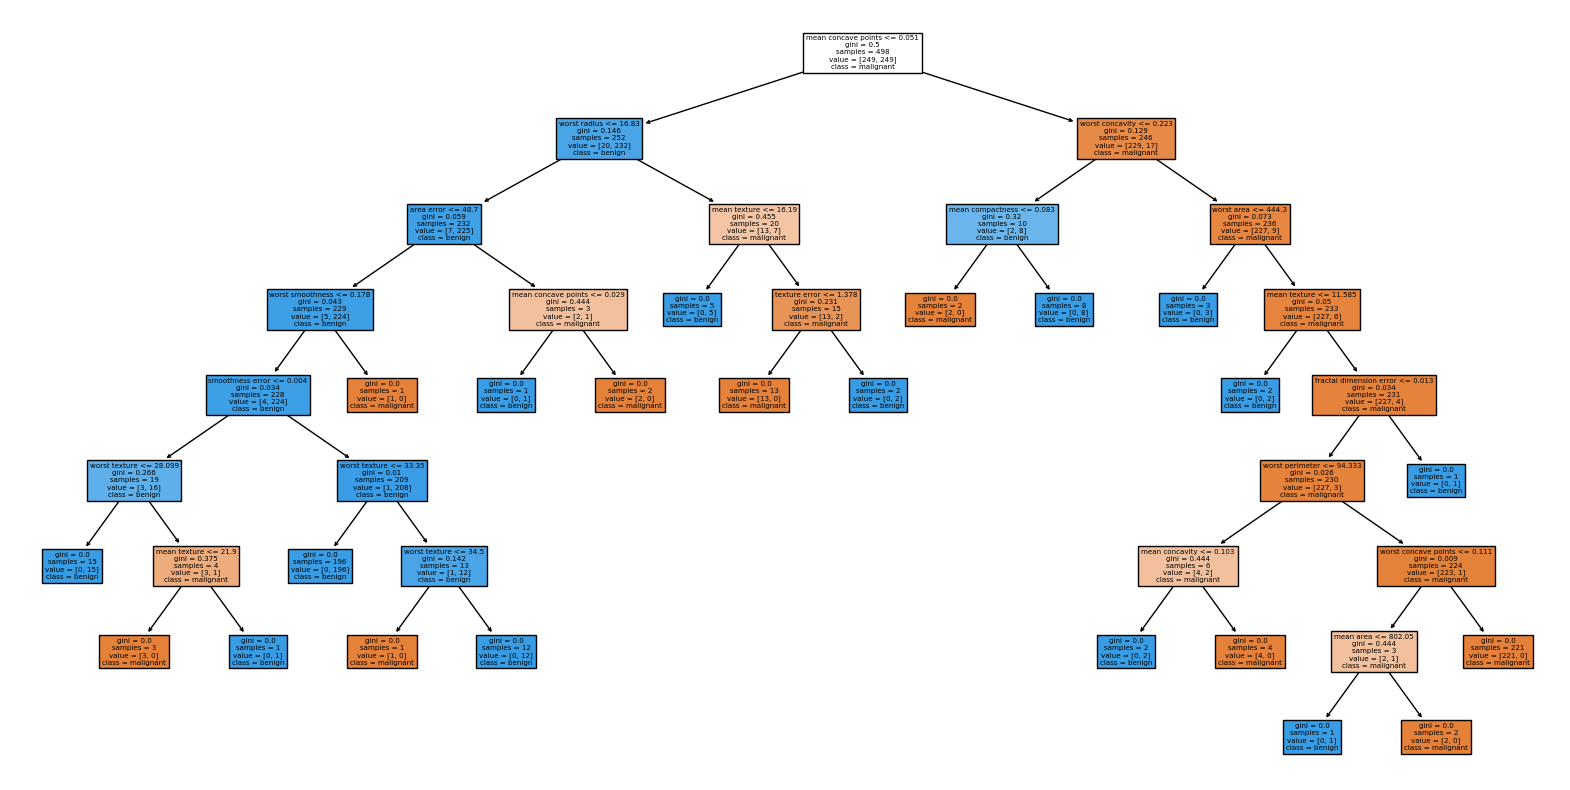

Decision tree after the hyperparameter tuning


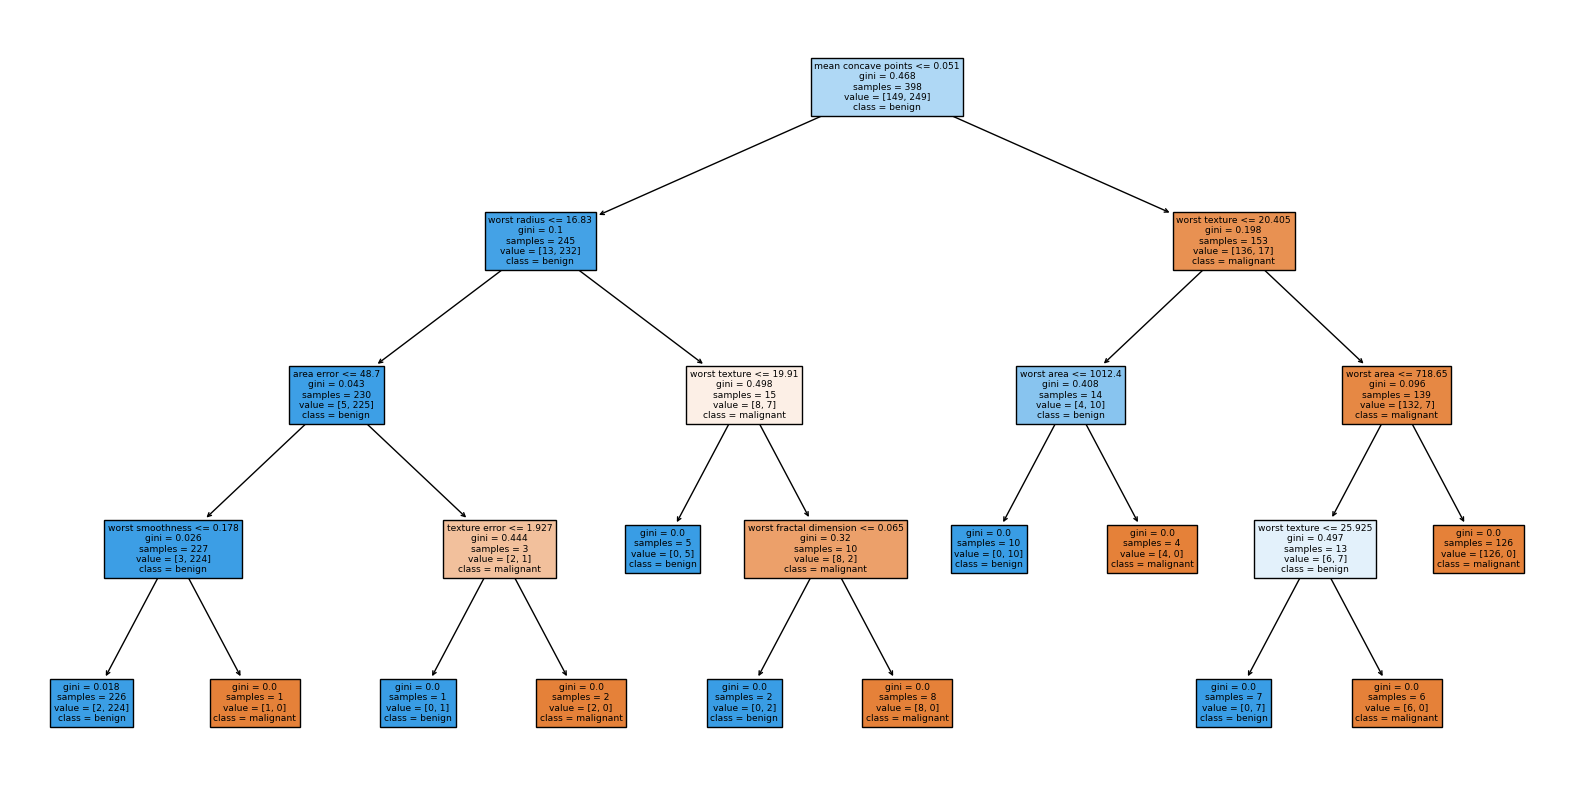

In [16]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
print("Decison tree before the hyperparameter tuning")
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
print("Decision tree after the hyperparameter tuning")
plt.show()


